# Proof Of Concept Vega_Lite-Api

## Nous allons etudier ici la maniere de se servir de vega-lite-api pour rendre nos charts
* Vega-Lite is a declarative language for interactive data visualization. Vega-Lite offers a powerful and concise visualization grammar for quickly building a wide range of statistical graphics. (cf: https://observablehq.com/@uwdata/introduction-to-vega-lite )
* Vega-lite est LA librarie de reference (utilisée sur eurostat), elle est equipée de fonctions de partage & embed nativement, ce qui nous interresse au plus haut point
* vega-lite est interactive deja dans nos jupyterlabs notebooks

In [5]:
import vl from "npm:vega-lite-api"
import { display } from "https://deno.land/x/display@v0.1.1/mod.ts"

## cet exemple illustre l'interacivité de vega-lite
* un tooltip configurable sur chaque valeures du graph !
* zoomable & dragable !

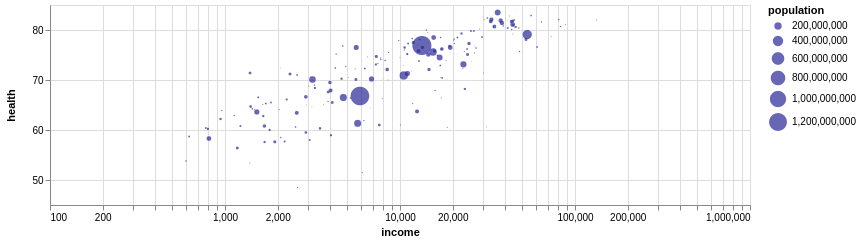

In [23]:
const plot = vl
    .markCircle()
    .params(vl.selectInterval().bind("scales"))
    .width(700)
    .data(
        "https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv",
    )
    .encode(
        vl.x().field("income").scale({ type: "log"}),
        vl.y().fieldQ("health").scale({zero: false}).axis({ minExtent: 30 }),
        vl.size(vl.fieldQ("population")),
        vl.color({ value: "#262696" }),
        vl.tooltip(['income','health']),
    );
display(plot)

## quid de l'utilisation de vega-lite avec polars ??
* vega-lite n'est pour l'instant pas compatible avec polars, elle l'est cependant avec pandas, malheureusement, la fonction polars to_pandas() n'est pas encore disponible pour nodejs-polars (cf: https://github.com/pola-rs/nodejs-polars/issues/30 )
* "Statistical visualization in Vega-Lite begins with "tidy" data frames" (https://observablehq.com/@uwdata/introduction-to-vega-lite)
* nous utiliserons ici la methode writeCSV de nodejs-polars pour reconvertir en buffer CSV notre dataframe apres nos manipulations avec polars

In [14]:
import * as pl from "npm:nodejs-polars"

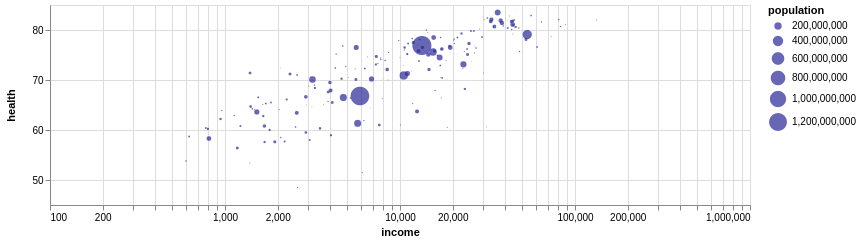

In [24]:
const response = await fetch("https://raw.githubusercontent.com/vega/vega/main/docs/data/gapminder-health-income.csv")
const data = await response.text()
const df = pl.readCSV(data)

/*
    ici toute manipulation de nos dataframes avec polars
*/

const plot2 = vl
    .markCircle()
    .params(vl.selectInterval().bind("scales"))
    .width(700)
    .data(
        df.writeCSV()   // converstion en buffer CVS
    )
    .encode(
        vl.x().field("income").scale({ type: "log"}),
        vl.y().fieldQ("health").scale({zero: false}).axis({ minExtent: 30 }),
        vl.size(vl.fieldQ("population")),
        vl.color({ value: "#262696" }),
    );
display(plot) 
